## Importing Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams.update({'font.size': 15})
import warnings
warnings.filterwarnings('ignore')

In [2]:
from datetime import datetime as dt
from scipy.stats import stats
import pandas_profiling
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

## Importing the Input Datasets

In [4]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2. Walmart Store Sales Forecasting/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2. Walmart Store Sales Forecasting/test.csv')
features = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2. Walmart Store Sales Forecasting/features.csv')
stores = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2. Walmart Store Sales Forecasting/stores.csv')

## Data Inspection

In [ ]:
print(train.head())
print(train.info())
print(train.shape)

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None
(421570, 5)


In [ ]:
print(test.head())
print(test.info())
print(test.shape)

   Store  Dept        Date  IsHoliday
0      1     1  2012-11-02      False
1      1     1  2012-11-09      False
2      1     1  2012-11-16      False
3      1     1  2012-11-23       True
4      1     1  2012-11-30      False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB
None
(115064, 4)


In [ ]:
print(stores.head())
print(stores.info())
print(stores.shape)

   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None
(45, 3)


In [ ]:
print(features.head())
print(features.info())
print(features.shape)

   Store        Date  Temperature  ...         CPI  Unemployment  IsHoliday
0      1  2010-02-05        42.31  ...  211.096358         8.106      False
1      1  2010-02-12        38.51  ...  211.242170         8.106       True
2      1  2010-02-19        39.93  ...  211.289143         8.106      False
3      1  2010-02-26        46.63  ...  211.319643         8.106      False
4      1  2010-03-05        46.50  ...  211.350143         8.106      False

[5 rows x 12 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non

### Merging the Datasets

In [5]:
train1 = train.merge(right=features, how='left', on=['Store', 'Date', 'IsHoliday']).merge(right=stores, how='left', on=['Store'])
test1 = test.merge(right=features, how='left', on=['Store', 'Date', 'IsHoliday']).merge(right=stores, how='left', on=['Store'])

### Merged Datasets Inspections

In [ ]:
print(train1.head())
print(train1.info())
print(train1.shape)

   Store  Dept        Date  Weekly_Sales  ...         CPI  Unemployment  Type    Size
0      1     1  2010-02-05      24924.50  ...  211.096358         8.106     A  151315
1      1     1  2010-02-12      46039.49  ...  211.242170         8.106     A  151315
2      1     1  2010-02-19      41595.55  ...  211.289143         8.106     A  151315
3      1     1  2010-02-26      19403.54  ...  211.319643         8.106     A  151315
4      1     1  2010-03-05      21827.90  ...  211.350143         8.106     A  151315

[5 rows x 16 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float6

In [ ]:
print(test1.head())
print(test1.info())
print(test1.shape)

   Store  Dept        Date  IsHoliday  ...         CPI  Unemployment  Type    Size
0      1     1  2012-11-02      False  ...  223.462779         6.573     A  151315
1      1     1  2012-11-09      False  ...  223.481307         6.573     A  151315
2      1     1  2012-11-16      False  ...  223.512911         6.573     A  151315
3      1     1  2012-11-23       True  ...  223.561947         6.573     A  151315
4      1     1  2012-11-30      False  ...  223.610984         6.573     A  151315

[5 rows x 15 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   Date          115064 non-null  object 
 3   IsHoliday     115064 non-null  bool   
 4   Temperature   115064 non-null  float64
 5   Fuel_Price    115064 non-null  float64
 6   MarkDown1  

In [ ]:
train1.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000
MarkDown5,151432.0,4628.975079,5962.887455,135.160,1878.440000,3359.45000,5563.800000,108519.280000


### Profile Report via Pandas Profiling

Using a config file to minimalize the output report.

In [ ]:
ProfileReport = pandas_profiling.ProfileReport(train1, config_file='/content/drive/MyDrive/Colab Notebooks/config_medium.yaml')

In [ ]:
#ProfileReport.to_file(output_file='ProfileReport.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
ProfileReport

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Duplicate Value Inspection

In [ ]:
train1.duplicated().sum()

0

In [ ]:
test1.duplicated().sum()

0

There are no duplicates obseravtions in train and test data both.

### Missing Value Inspection

In [ ]:
import missingno as msno

In [ ]:
pd.DataFrame({'Count': train1.isna().sum().values,
 'Percentage':round(train1.isna().sum()/train1.shape[0]*100,2).values}, index=train1.isna().sum().index )

,Count,Percentage
Store,0,0.00
Dept,0,0.00
Date,0,0.00
Weekly_Sales,0,0.00
IsHoliday,0,0.00
Temperature,0,0.00
Fuel_Price,0,0.00
MarkDown1,270889,64.26
MarkDown2,310322,73.61
MarkDown3,284479,67.48


In train data, Only 'MarkDown' variables have high amount of missing values as Markdown Data is only available after Nov 2011 and is not available for all stores, all the time.

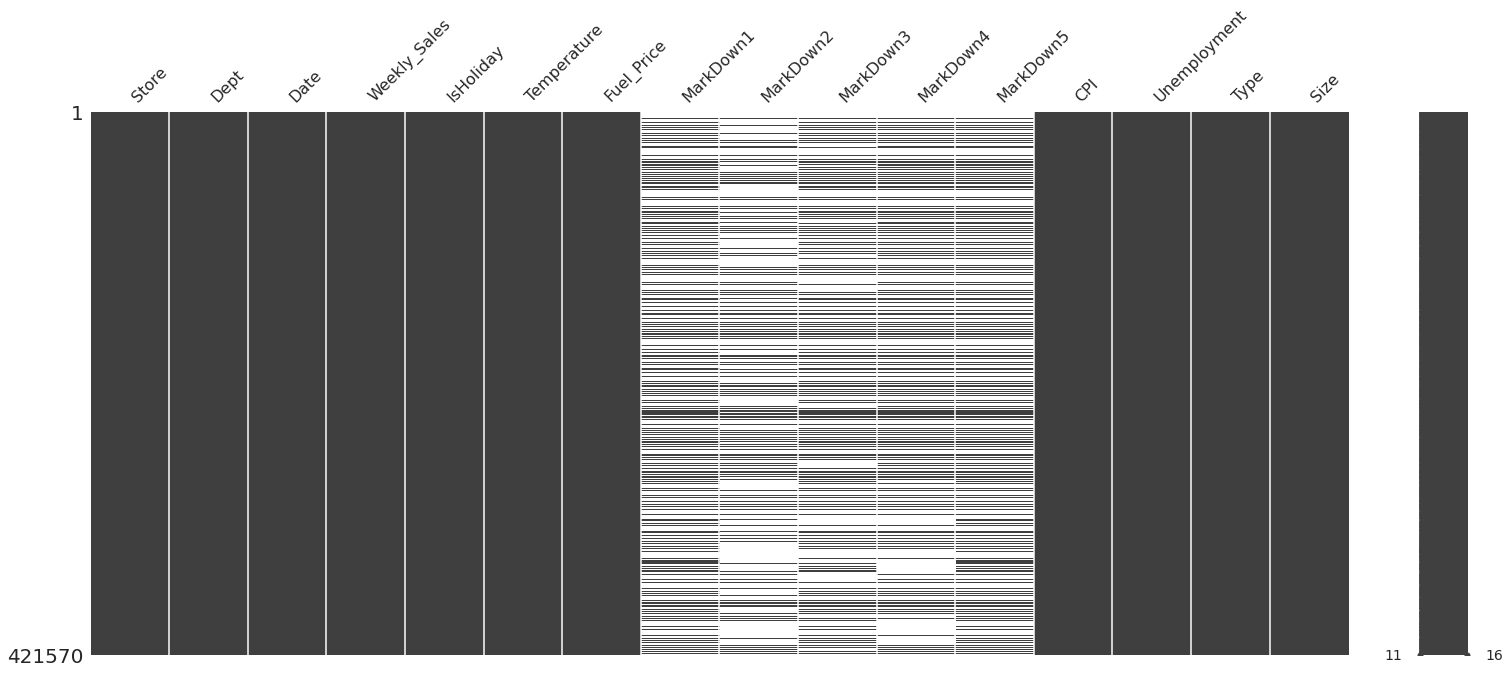

In [ ]:
msno.matrix(train1)

In [ ]:
pd.DataFrame({'Count': test1.isna().sum().values,
 'Percentage':round(test1.isna().sum()/test1.shape[0]*100,2).values}, index=test1.isna().sum().index )

,Count,Percentage
Store,0,0.00
Dept,0,0.00
Date,0,0.00
IsHoliday,0,0.00
Temperature,0,0.00
Fuel_Price,0,0.00
MarkDown1,149,0.13
MarkDown2,28627,24.88
MarkDown3,9829,8.54
MarkDown4,12888,11.20


In test data, there are still some 'MarkDown' variables having missing values but much less in comparison to train data, 'MarkDown2' having the maximum amount (24.88%) of missing values, while 'MarkDown5' having none.
And also, 'CPI' and 'Unemployment' have same amount of missing values(33%).

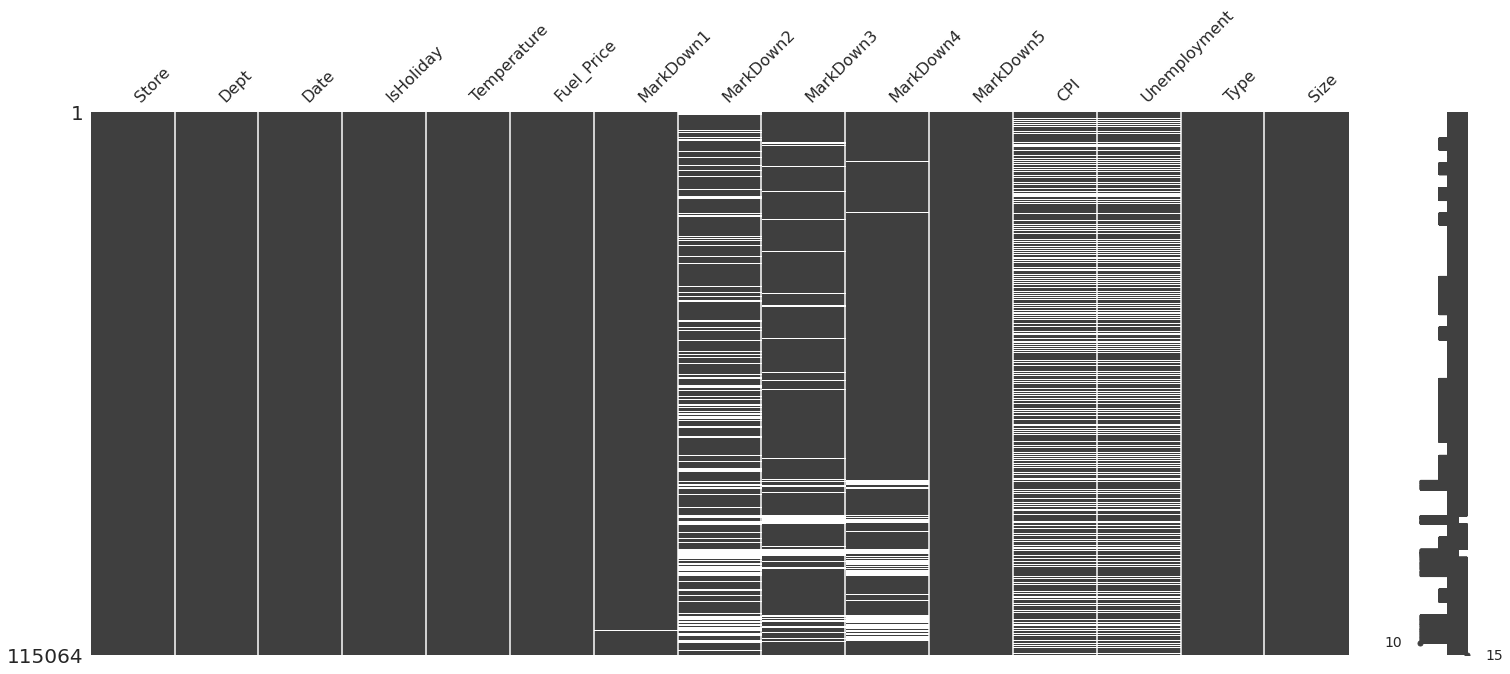

In [ ]:
msno.matrix(test1)

## Data Preparation

First, We will create a copy of the original train1 and test1 data to makes changes on them.

In [6]:
train2= train1.copy()
test2 = test1.copy()

### Derive Variable Creation

In [ ]:
print('No. of Stores :',len(train2.Store.unique()))
print('No. of Departments in each Store:',len(train2.Dept.unique()))
print('No. of unique Date values :',len(train2.Date.unique()))

No. of Stores : 45
No. of Departments in each Store: 81
No. of unique Date values : 143


Approach : Even though this data has a "Datetime" variable, We are still going for a Regression approach rather than a Time - Series Regression technique as the Date variable has only 143 unqiue values which is repeating for each of the 81 Departments for each of the 45 Stores.

We have to convert Datetime variable into a numerical value

In [7]:
train2.Date = pd.to_datetime(train2.Date)
test2.Date = pd.to_datetime(test2.Date)

In [8]:
train2['Year'] = train2.Date.dt.year
train2['Month'] = train2.Date.dt.month
train2['Week'] = train2.Date.dt.week

In [9]:
test2['Year'] = test2.Date.dt.year
test2['Month'] = test2.Date.dt.month
test2['Week'] = test2.Date.dt.week

In [10]:
train2.drop(columns=['Date'], inplace=True)
test2.drop(columns=['Date'], inplace=True)

## Exloratory Data Analysis

### Monthly Average Sales vs Month

In [ ]:
monthly_sales = pd.crosstab(index=train2.Month, columns=train2.Year, values=train2.Weekly_Sales, aggfunc='mean').unstack().reset_index().round(2)
monthly_sales.columns = ['Year', 'Month', 'Monthly Average Sales']
monthly_sales.head()

,Year,Month,Monthly Average Sales
0,2010,1,NaN
1,2010,2,16076.78
2,2010,3,15432.63
3,2010,4,15745.55
4,2010,5,15996.48


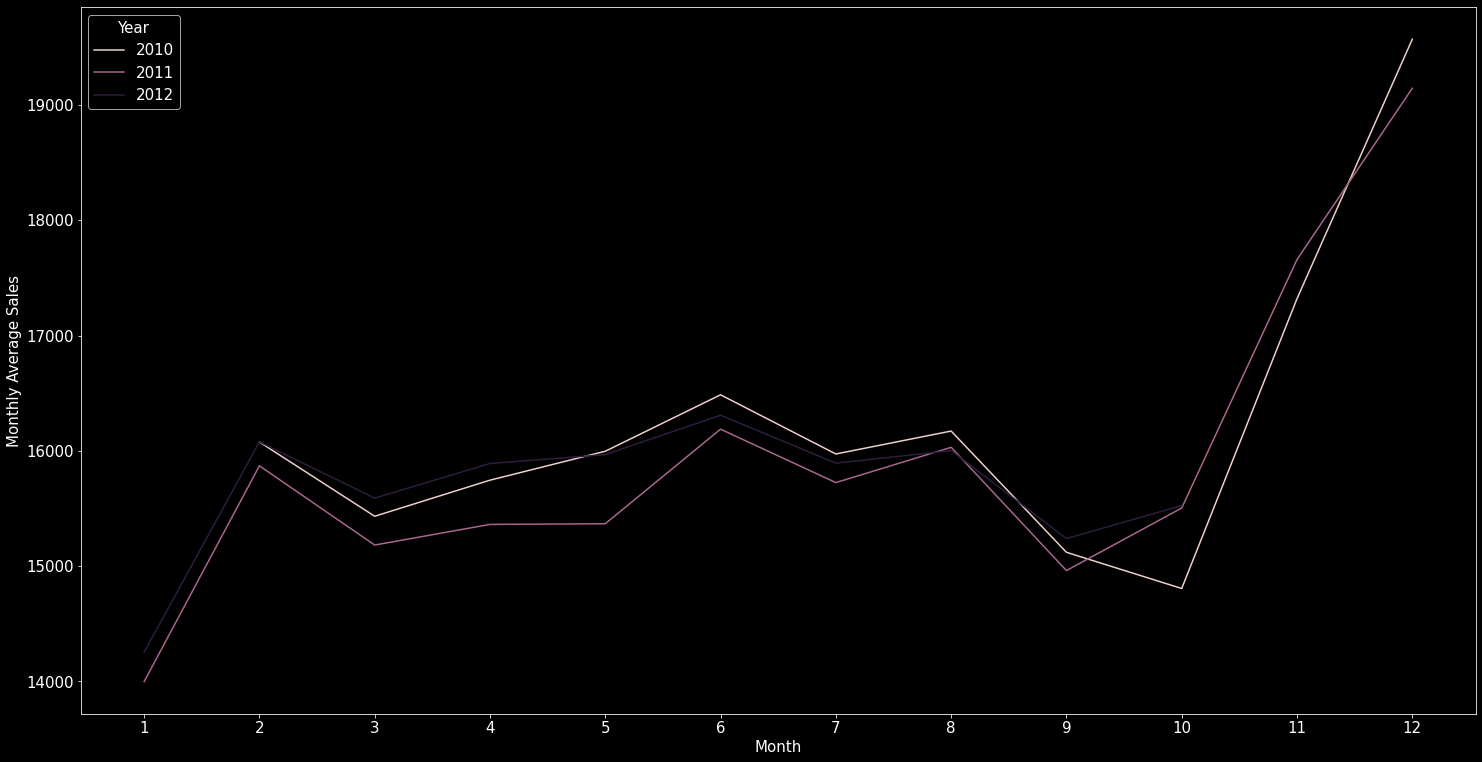

In [ ]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(25,13))
  sns.lineplot(data=monthly_sales, x='Month', y='Monthly Average Sales', hue='Year')
plt.xticks(ticks=range(1,13))
plt.show()

Month does have some impact on sales, as we can see the same pattern for all three years. December always has highest sales due to 'Christmas' and 'New Year' followed by January which has the least sales records.

###Weekly Average Sales vs Weeks

In [ ]:
weekly_sales = pd.crosstab(index=train2.Year, columns=train2.Week, values=train2.Weekly_Sales, aggfunc='mean').unstack().reset_index().round(2)
weekly_sales.columns = ['Week', 'Year', 'Weekly Average Sales']
weekly_sales.head()

,Week,Year,Weekly Average Sales
0,1,2010,NaN
1,1,2011,14599.24
2,1,2012,15121.23
3,2,2010,NaN
4,2,2011,13891.28


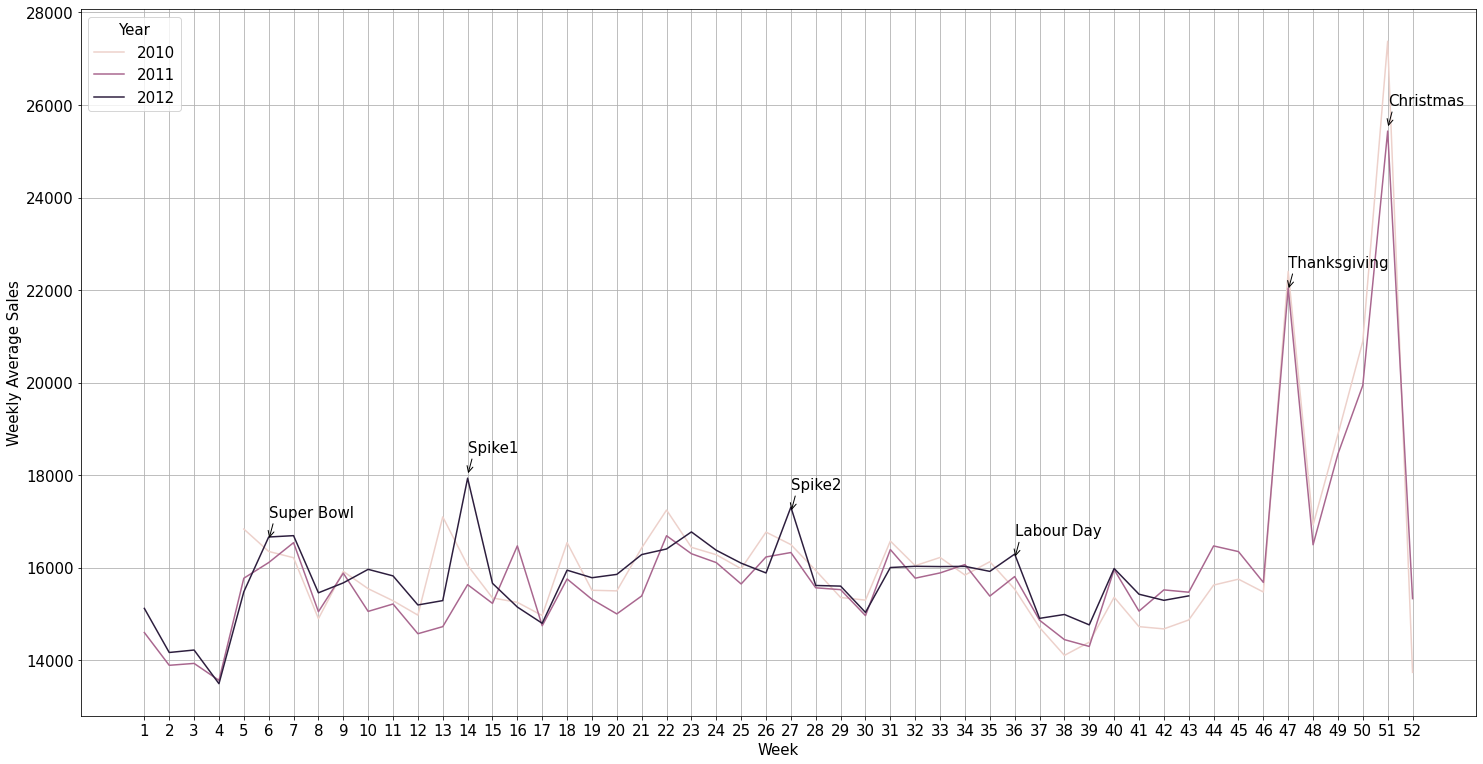

In [ ]:
plt.figure(figsize=(25,13))
sns.lineplot(data=weekly_sales, x='Week', y='Weekly Average Sales', hue='Year')
plt.xticks(ticks=range(1,53))
plt.grid()
plt.annotate('Super Bowl', xy =(6, 16600), xytext =(6, 17100), arrowprops = dict(arrowstyle = "->", connectionstyle = "angle, angleA = 0, angleB = 75"))
plt.annotate('Labour Day', xy =(36, 16200), xytext =(36, 16700), arrowprops = dict(arrowstyle = "->", connectionstyle = "angle, angleA = 0, angleB = 75"))
plt.annotate('Thanksgiving', xy =(47, 22000), xytext =(47, 22500), arrowprops = dict(arrowstyle = "->", connectionstyle = "angle, angleA = 0, angleB = 75"))
plt.annotate('Christmas', xy =(51, 25500), xytext =(51, 26000), arrowprops = dict(arrowstyle = "->", connectionstyle = "angle, angleA = 0, angleB = 75"))
plt.annotate('Spike1', xy =(14, 18000), xytext =(14, 18500), arrowprops = dict(arrowstyle = "->", connectionstyle = "angle, angleA = 0, angleB = 75"))
plt.annotate('Spike2', xy =(27, 17200), xytext =(27, 17700), arrowprops = dict(arrowstyle = "->", connectionstyle = "angle, angleA = 0, angleB = 75"))
plt.show()

In [ ]:
list(train2.loc[train2.IsHoliday == True]['Week'].value_counts().index)

[6, 36, 47, 52]

6, 36, 47 and 52 are the weeks on which these 4 holidays falls : Super Bowl, Labour Day, Thanksgiving and Christmas, respectively.

There are some spikes which can clearly be seen in the line plot above, with some research and analysis, it brings us to the inferences below:

1. Spike1 (Week 12 - 15) - Easter Day
*   2010 - Week 13
*   2011 - Week 16
*   2012 - Week 14
*   2013 - Week 13
2. Spike2 (Week 26 - 28) - Independence Day aka Fourth of July
*   2010 - Week 26
*   2011 - Week 27
*   2012 - Week 27
*   2013 - Week 27

So, clearly these Holiday have been missed in the Data and have not been explained in the 'IsHoliday' Variable.




#### Updating "IsHoliday" variable with new information in 'train2' and 'test2' data.

In [11]:
# For Easter Day
train2.loc[(train2.Year==2010) & (train2.Week==13), 'IsHoliday'] = True
train2.loc[(train2.Year==2011) & (train2.Week==16), 'IsHoliday'] = True
train2.loc[(train2.Year==2012) & (train2.Week==14), 'IsHoliday'] = True

In [12]:
test2.loc[(test2.Year==2012) & (test2.Week==14), 'IsHoliday'] = True
test2.loc[(test2.Year==2013) & (test2.Week==13), 'IsHoliday'] = True

In [13]:
# For Independence Day
train2.loc[(train2.Year==2010) & (train2.Week==26), 'IsHoliday'] = True
train2.loc[(train2.Year==2011) & (train2.Week==27), 'IsHoliday'] = True
train2.loc[(train2.Year==2012) & (train2.Week==27), 'IsHoliday'] = True

In [14]:
test2.loc[(test2.Year==2012) & (test2.Week==27), 'IsHoliday'] = True
test2.loc[(test2.Year==2013) & (test2.Week==27), 'IsHoliday'] = True

As Holidays fell on different weeks every year, having a "Week" variable can cause noise in the model which might lead to poor predictions for future Data.
"Year" variable is also irrelevant in terms of significancy but "Month" variable can help in explaining some variance in the 'Weekly_Sales' because as we can
see in the lineplot, sales for certain months is always high eg: December, May etc. and always low for other months like January, September etc.

### Sales on Holidays vs Non Holidays

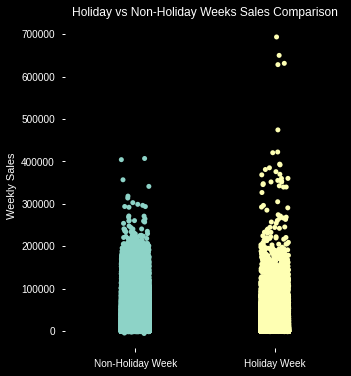

In [ ]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(5,6))
  sns.stripplot(data = train2, x='IsHoliday', y='Weekly_Sales')
plt.xticks(range(0,2), ['Non-Holiday Week', 'Holiday Week'])
plt.xlabel('')
plt.ylabel('Weekly Sales')
plt.title('Holiday vs Non-Holiday Weeks Sales Comparison')
plt.grid(False)
plt.show()

In [ ]:
train2.loc[train2.IsHoliday==True,['IsHoliday', 'Week', 'Weekly_Sales']].sort_values(by='Weekly_Sales', ascending=False).iloc[0:4]

,IsHoliday,Week,Weekly_Sales
95373,True,47,693099.36
338013,True,47,649770.18
95425,True,47,630999.19
337961,True,47,627962.93


As expected, sales for Holiday Weeks are higher than Non-Holiday Weeks. But there are 4 extreme data points clearly visible in Holiday Week Sales Distribution, On further analysis, Those 4 extreme data points are for 'Thanksgiving' week.

In [15]:
train2.drop(columns=['Week', 'Year'], inplace=True)
test2.drop(columns=['Week', 'Year'], inplace=True)

Store Type

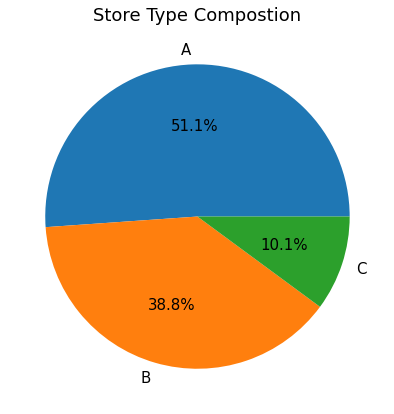

In [ ]:
plt.figure(figsize=(7,7))
plt.pie(train2.Type.value_counts(), labels=train2.Type.value_counts().index, autopct='%.1f%%')
plt.title('Store Type Compostion')
plt.show()

### Size vs Type

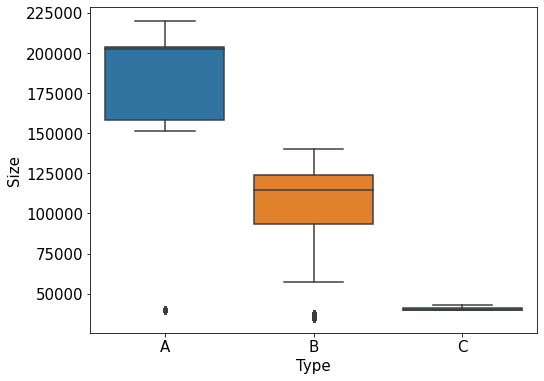

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=train2, x='Type', y='Size')
plt.show()

The distribution of size of each type of stores clearly shows that the store types are divided on the basis their size such that:


*   Type A : Large Stores
*   Type B : Medium Sized Stores
*   Type C : Small Stores



### Store vs Sales

In [ ]:
store_sales = train2[['Store', 'Type', 'Weekly_Sales']].groupby('Store').agg({'Type':'max', 'Weekly_Sales':'mean'}).reset_index().rename(columns={'Weekly_Sales':'Avg_Sales'}).sort_values(by='Avg_Sales', ascending=False)

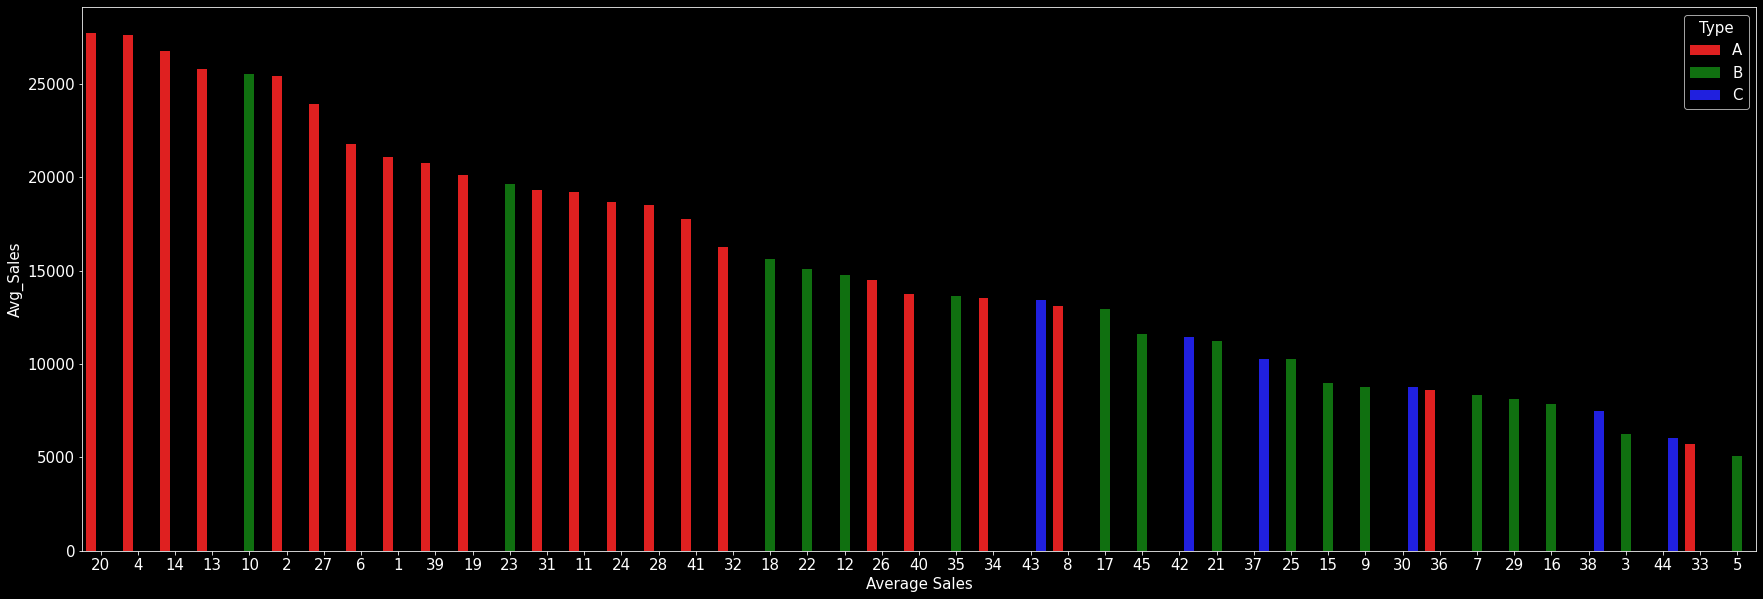

In [ ]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(30,10))
  sns.barplot(x=store_sales.Store, y=store_sales.Avg_Sales, hue=store_sales.Type, order=list(store_sales.Store), palette=['r', 'g', 'b'])
plt.xticks(fontsize=15)
plt.xlabel('Average Sales')
plt.show()

There is a pretty visible gradient of change in sales across different stores amongst which Store 20 (Type A) has the highest average sales whereas Store 5 (Type C) has the lowest. Also, we can clearly see a difference in average sales across different Store Types.

### Department vs Sales

In [ ]:
dept_sales = train2[['Dept', 'Weekly_Sales']].groupby('Dept').mean().reset_index().rename(columns={'Weekly_Sales':'Avg_Sales'})

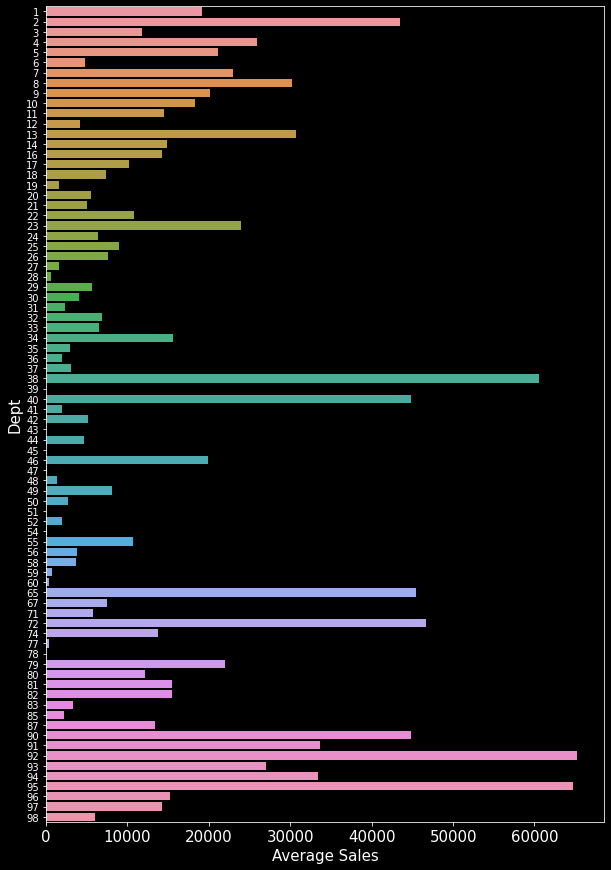

In [ ]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(10,15))
  sns.barplot(x=dept_sales.Avg_Sales, y = dept_sales.Dept, orient=('h'))
  plt.xlabel('Average Sales')
plt.yticks(fontsize=10)
plt.show()

A huge variation in sales can be seen, Departments like 92, 95, 38 are doing extremely good while some are strugging pretty hard. Department 78, 47, 43, 39 aren't making any sales at all. 

### Separating Numerical and Categorical Variables

In [16]:
num_cols = train2.loc[:, (train2.dtypes == 'float64') | (train2.dtypes == 'int64')].columns
cat_cols = train2.loc[:, (train2.dtypes == 'object') | (train2.dtypes == 'bool')].columns

In [ ]:
train2[cat_cols].head()

,IsHoliday,Type
0,False,A
1,True,A
2,False,A
3,False,A
4,False,A


In [ ]:
train2[num_cols].head()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Month
0,1,1,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,151315,2
1,1,1,46039.49,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,151315,2
2,1,1,41595.55,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,151315,2
3,1,1,19403.54,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,151315,2
4,1,1,21827.90,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,151315,3


### Data Audit Reports

UDF to get Audit report for Categorical Variables

In [ ]:
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

UDF to get Audit report for Categorical Variables

In [ ]:
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [ ]:
train2[cat_cols].apply(lambda x: categorical_var_summary(x))

,Type
N,421570
NMISS,0
MODE,A
FREQ,215478
PERCENT,51.11


In [ ]:
train2[num_cols].apply(lambda x: continuous_var_summary(x)).round(2)

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Month
N,421570.00,421570.00,4.215700e+05,421570.00,421570.00,1.506810e+05,1.112480e+05,1.370910e+05,1.349670e+05,1.514320e+05,421570.00,421570.00,4.215700e+05,421570.00
NMISS,0.00,0.00,0.000000e+00,0.00,0.00,2.708890e+05,3.103220e+05,2.844790e+05,2.866030e+05,2.701380e+05,0.00,0.00,0.000000e+00,0.00
SUM,9359084.00,18658822.00,6.737219e+09,25332166.06,1416907.95,1.091898e+09,3.709708e+08,1.973317e+08,4.566161e+08,7.009750e+08,72173604.72,3355818.91,5.764039e+10,2718920.00
MEAN,22.20,44.26,1.598126e+04,60.09,3.36,7.246420e+03,3.334630e+03,1.439420e+03,3.383170e+03,4.628980e+03,171.20,7.96,1.367279e+05,6.45
MEDIAN,22.00,37.00,7.612030e+03,62.09,3.45,5.347450e+03,1.920000e+02,2.460000e+01,1.481310e+03,3.359450e+03,182.32,7.87,1.401670e+05,6.00
STD,12.79,30.49,2.271118e+04,18.45,0.46,8.291220e+03,9.475360e+03,9.623080e+03,6.292380e+03,5.962890e+03,39.16,1.86,6.098058e+04,3.24
VAR,163.46,929.77,5.157979e+08,340.33,0.21,6.874435e+07,8.978240e+07,9.260364e+07,3.959410e+07,3.555603e+07,1533.45,3.47,3.718632e+09,10.52
MIN,1.00,1.00,-4.988940e+03,-2.06,2.47,2.700000e-01,-2.657600e+02,-2.910000e+01,2.200000e-01,1.351600e+02,126.06,3.88,3.487500e+04,1.00
P1,1.00,1.00,5.000000e+00,18.30,2.56,1.776000e+01,-9.900000e-01,6.000000e-02,3.970000e+00,3.519700e+02,126.11,4.16,3.487500e+04,1.00
P5,3.00,4.00,5.997000e+01,27.31,2.65,1.491900e+02,1.950000e+00,6.500000e-01,2.876000e+01,7.155200e+02,126.50,5.33,3.969000e+04,1.00


### Bivariate Analysis via Correlation Matrix

In [ ]:
Corr_Matrix = train2[num_cols].corr()
Corr_Matrix

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Month
Store,1.000000,0.024004,-0.085195,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552,-0.182881,0.001011
Dept,0.024004,1.000000,0.148032,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837,-0.002966,0.000904
Weekly_Sales,-0.085195,0.148032,1.000000,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864,0.243828,0.028409
Temperature,-0.050097,0.004437,-0.002312,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730,-0.058313,0.235983
Fuel_Price,0.065290,0.003572,-0.000120,0.143859,1.000000,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.164210,-0.033853,0.003361,-0.040876
MarkDown1,-0.119588,-0.002426,0.085251,-0.040594,0.061371,1.000000,0.024486,-0.108115,0.819238,0.160257,-0.055558,0.050285,0.345673,-0.176188
MarkDown2,-0.035173,0.000290,0.024130,-0.323927,-0.220895,0.024486,1.000000,-0.050108,-0.007768,-0.007440,-0.039534,0.020940,0.108827,-0.005310
MarkDown3,-0.031556,0.001784,0.060385,-0.096880,-0.102092,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,-0.023590,0.012818,0.048913,0.187871
MarkDown4,-0.009941,0.004257,0.045414,-0.063947,-0.044986,0.819238,-0.007768,-0.071095,1.000000,0.107792,-0.049628,0.024963,0.168196,-0.194865
MarkDown5,-0.026634,0.000109,0.090362,-0.017544,-0.128065,0.160257,-0.007440,-0.026467,0.107792,1.000000,0.060630,-0.003843,0.304575,0.097347


In [ ]:
#Corr_Matrix.to_csv('Corr_Matrix.csv')

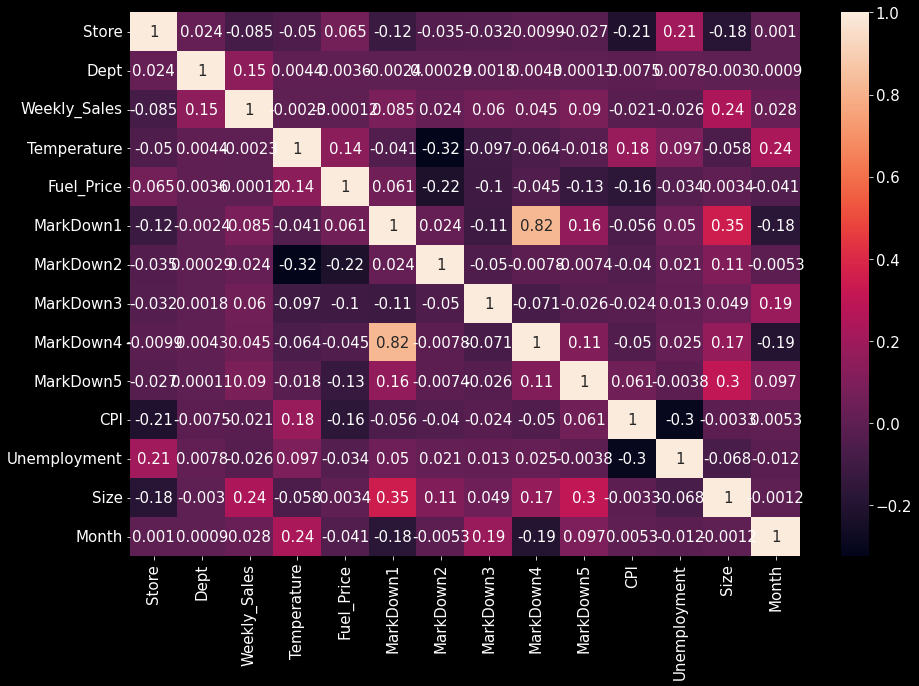

In [ ]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(15,10))
  sns.heatmap(Corr_Matrix, annot=True)
plt.show()

After performing Bivariate Anlaysis via Correaltion Matrix, Dropping these variables due to their insignificancy.

In [ ]:
train2.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Month'],
      dtype='object')

In [17]:
list_drop = ['Temperature', 'Fuel_Price', 'MarkDown4', 'CPI', 'Unemployment']

In [18]:
train2.drop(columns=list_drop, inplace=True)
test2.drop(columns=list_drop, inplace=True)

In [19]:
num_cols

Index(['Store', 'Dept', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Size', 'Month'],
      dtype='object')

'Month' is actually a Nominal Variable.

In [20]:
num_cols = train2.columns.difference(['IsHoliday', 'Type', 'Month'])

In [21]:
cat_cols = [col for col in train2.columns if col not in num_cols]

##Data Pre-Processing

### Outlier Treatment

In [ ]:
len(train2[num_cols].columns)

8

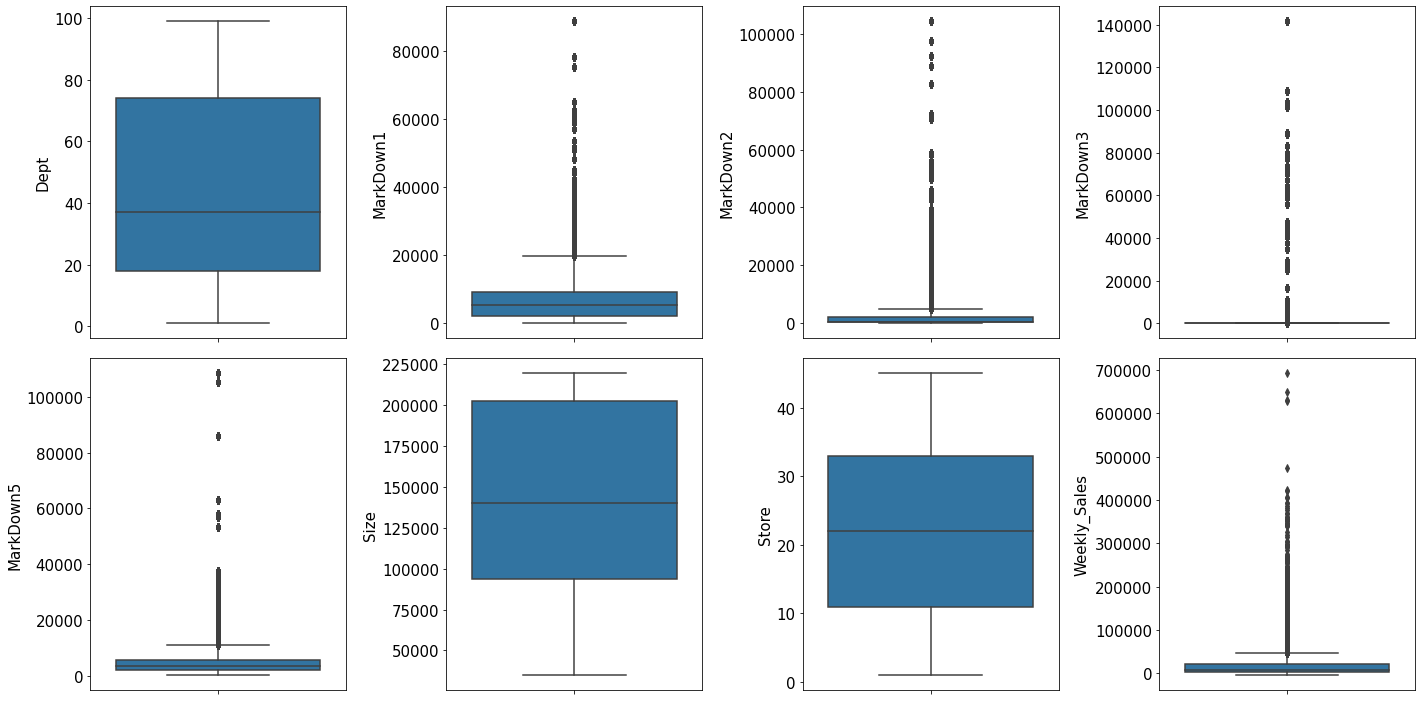

In [ ]:
fig, ax = plt.subplots(2,4, figsize=(20,10))
ax = ax.flatten()
for i,j in enumerate(train2[num_cols].columns):
  ax[i] = sns.boxplot(data=train2[num_cols], y=j, ax=ax[i])
plt.tight_layout()
plt.show()

All the 'MarkDown' variables have huge numbers of outliers, These are the same variables which have very huge amount of missing values. As they already have huge information loss, it would only be appropriate to clip them at 99th and 1st percentile so the remaning information wouldn't change much. 

Capping the variables at 1st and 99th percentile.

In [22]:
train2[num_cols] = train2[num_cols].apply(lambda x: x.clip(upper=x.dropna().quantile(0.99), lower=x.dropna().quantile(0.01)))

### Missing Value Treatment

In [ ]:
train2.isna().sum()/train.shape[0]*100

Store            0.000000
Dept             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown5       64.079038
Type             0.000000
Size             0.000000
Month            0.000000
dtype: float64

As MarkDown data is only available after Nov 2011, and is not available for all stores all the time, thus All four MarkDown variables ( 1,2,3 and 5) in train data have huge number of missing values approx. 65% except of 'MarkDown2' which has around 73%+ missing values which is way too much. So we have to drop it, We will be keeping other MarkDown variables because of their Business Importance and will Impute them with zero.

In [23]:
train2.drop(columns = ['MarkDown2'], inplace=True)
test2.drop(columns = ['MarkDown2'], inplace=True)

In [24]:
num_cols = list(num_cols)
num_cols.remove('MarkDown2')

In [25]:
train2.fillna(0, inplace=True)

In [26]:
test2.fillna(0, inplace=True)

In [27]:
print('Missing Values in train2 :', train2.isna().sum().sum())
print('Missing Values in test2 :', test2.isna().sum().sum())

Missing Values in train2 : 0
Missing Values in test2 : 0


### Dummy Variables Creation

In [ ]:
train2[cat_cols].head()

,IsHoliday,Type,Month
0,False,A,2
1,True,A,2
2,False,A,2
3,False,A,2
4,False,A,3


In [28]:
OHCenc = OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first')

In [29]:
OH_cols_train = pd.DataFrame(OHCenc.fit_transform(train2[cat_cols]), columns=OHCenc.get_feature_names_out())

In [30]:
OH_cols_test = pd.DataFrame(OHCenc.transform(test2[cat_cols]), columns=OHCenc.get_feature_names_out())

In [31]:
OH_cols_train.head()

,IsHoliday_True,Type_B,Type_C,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Combining Numerical Variables and Dummy Variables Data

In [32]:
train_final = pd.concat([train2[num_cols], OH_cols_train], axis=1)

In [33]:
train_final.head()

,Dept,MarkDown1,MarkDown3,MarkDown5,Size,Store,Weekly_Sales,IsHoliday_True,Type_B,Type_C,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,1,0.0,0.0,0.0,151315,1,24924.50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,151315,1,46039.49,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,151315,1,41595.55,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,151315,1,19403.54,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,151315,1,21827.90,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(num_cols)

['Dept', 'MarkDown1', 'MarkDown3', 'MarkDown5', 'Size', 'Store', 'Weekly_Sales']


As there is no 'Weekly_Sales' (y) in the test data:

In [34]:
num_cols.remove('Weekly_Sales')

In [35]:
test_final = pd.concat([test2[num_cols], OH_cols_test], axis=1)

#### Separating Independent and Dependent Vairables.

In [36]:
train_features = train_final[train_final.columns.difference(['Weekly_Sales'])]
train_target = train_final[['Weekly_Sales']]
test_x = test_final

#### Splitting the train data further into training and validation datasets

In [37]:
train_x, val_x, train_y, val_y = train_test_split(train_features, train_target, test_size=0.3, random_state=12345)

In [38]:
print(train_x.shape)
print(train_y.shape)
print(val_x.shape)
print(val_y.shape)

(295099, 20)
(295099, 1)
(126471, 20)
(126471, 1)


### Standardization

In [39]:
sc = StandardScaler()

In [40]:
train_x_scaled = pd.DataFrame(sc.fit_transform(train_x), columns = train_x.columns)

In [41]:
val_x_scaled = pd.DataFrame(sc.transform(val_x), columns = val_x.columns)

In [42]:
test_x_scaled = pd.DataFrame(sc.transform(test_x), columns = test_x.columns)

In [ ]:
train_x_scaled.head()

,Dept,IsHoliday_True,MarkDown1,MarkDown3,MarkDown5,Month_10,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Size,Store,Type_B,Type_C
0,0.908834,-0.355855,-0.454311,-0.089880,-0.481731,-0.316525,-0.243541,-0.276574,-0.303563,-0.316926,-0.330086,-0.301327,-0.315169,-0.327967,3.170290,-0.316278,-0.262755,-0.328554,1.255299,-0.33547
1,1.695938,2.810130,-0.454311,-0.089880,-0.481731,-0.316525,-0.243541,-0.276574,3.294213,-0.316926,-0.330086,-0.301327,-0.315169,-0.327967,-0.315429,-0.316278,1.161451,-0.875600,-0.796623,-0.33547
2,0.318506,-0.355855,1.482444,-0.066579,0.023722,3.159311,-0.243541,-0.276574,-0.303563,-0.316926,-0.330086,-0.301327,-0.315169,-0.327967,-0.315429,-0.316278,1.099839,-0.172255,-0.796623,-0.33547
3,-0.468598,-0.355855,-0.454311,-0.089880,-0.481731,-0.316525,-0.243541,-0.276574,-0.303563,3.155308,-0.330086,-0.301327,-0.315169,-0.327967,-0.315429,-0.316278,1.141821,0.452941,-0.796623,-0.33547
4,-0.468598,-0.355855,-0.053055,0.130718,1.395059,-0.316525,-0.243541,3.615675,-0.303563,-0.316926,-0.330086,-0.301327,-0.315169,-0.327967,-0.315429,-0.316278,1.099970,0.687390,-0.796623,-0.33547



## Data Modelling

As holidays weeks have to be weighted fives time more than the non-holiday weeks, we will be using Weighted Mean Absolute Error as our evaluation metric.

#### UDF for Weighted Mean Absolute Error (WMAE)

In [43]:
def WMAE(df, y_true, y_pred):
  weights = df['IsHoliday_True'].apply(lambda x: 5 if x else 1)
  return mean_absolute_error(y_true.values, y_pred, sample_weight=weights)

As, GridsearchCV doesn't support scoring by a weighted metric, more specifically WMAE, we have to define our own function to train, validate and also evaluate our model and tune it with different model parameters.

#### UDF to Fit a model and Plot the Overfitting Curve

In [ ]:
def fit_model(model_name, **params):  
    model = model_name(random_state=12345, n_jobs=-1, **params).fit(train_x_scaled, train_y)
    train_wmae = WMAE(train_x, train_y, model.predict(train_x_scaled))
    val_wmae = WMAE(val_x, val_y, model.predict(val_x_scaled))
    return train_wmae, val_wmae

In [ ]:
def fit_model_and_plot(model_name, param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_wmae, val_wmae = fit_model(model_name, **params)
        train_errors.append(train_wmae)
        val_errors.append(val_wmae)
    with plt.style.context('dark_background'):  
      plt.figure(figsize=(16,8))
      plt.title('Overfitting Curve: ' + param_name)
      plt.plot(param_values, train_errors, 'y-o')
      plt.plot(param_values, val_errors, 'r-o')
      plt.xlabel(param_name)
      plt.ylabel('WMAE')
      plt.grid(False)
      plt.legend(['Training', 'Validation'])

### Ridge Regression

In [ ]:
Ridge_reg = Ridge(random_state=12345)

In [ ]:
Ridge_reg.fit(train_x_scaled, train_y)

Ridge(random_state=12345)

In [ ]:
print('WMAE for Training : {:.2f} | WMAE for Validation : {:.2f}'.format(WMAE(train_x, train_y, Ridge_reg.predict(train_x_scaled)),WMAE(val_x, val_y, Ridge_reg.predict(val_x_scaled)) ))

WMAE for Training : 14243.04 | WMAE for Validation : 14333.56


WMAE is too high for both Training and Validation, so we will move on to more sophisticated ensemble models

### Random Forest with weighted mae

In [ ]:
rf_reg = RandomForestRegressor(random_state=12345)

In [ ]:
rf_reg.fit(train_x_scaled, train_y)

RandomForestRegressor(random_state=12345)

In [ ]:
print('WMAE for Training : {:.2f} | WMAE for Validation : {:.2f}'.format(WMAE(train_x, train_y, rf_reg.predict(train_x_scaled)),WMAE(val_x, val_y, rf_reg.predict(val_x_scaled))))

WMAE for Training : 994.07 | WMAE for Validation : 1798.92


#### Tuning Random Forest Regressor

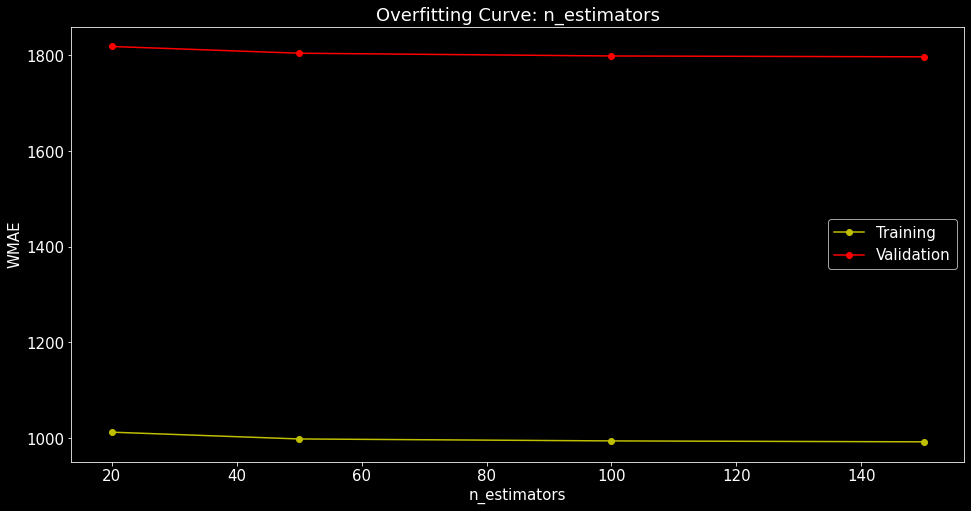

In [ ]:
fit_model_and_plot(RandomForestRegressor, 'n_estimators', [20,50,100,150])

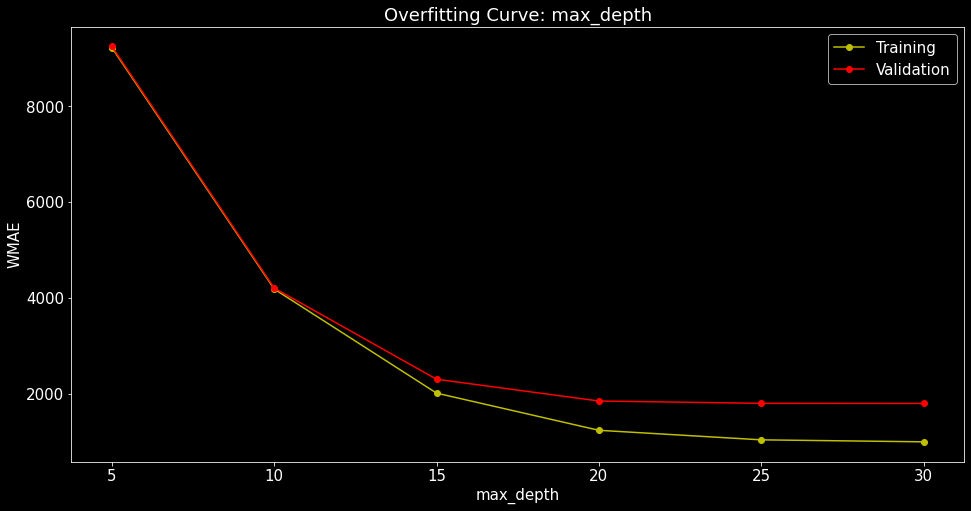

In [ ]:
fit_model_and_plot(RandomForestRegressor, 'max_depth', [5,10,15,20,25,30])

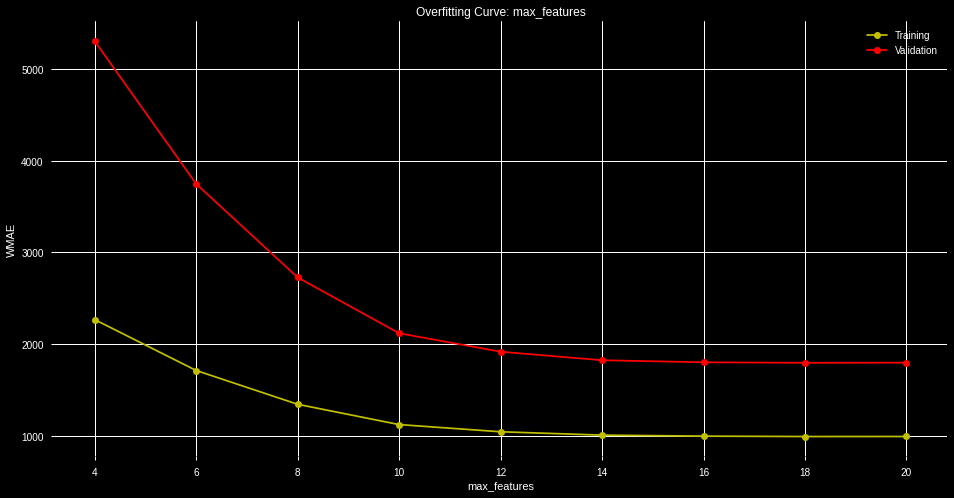

In [ ]:
fit_model_and_plot(RandomForestRegressor, 'max_features', [4,6,8,10,12,14,16,18,20])

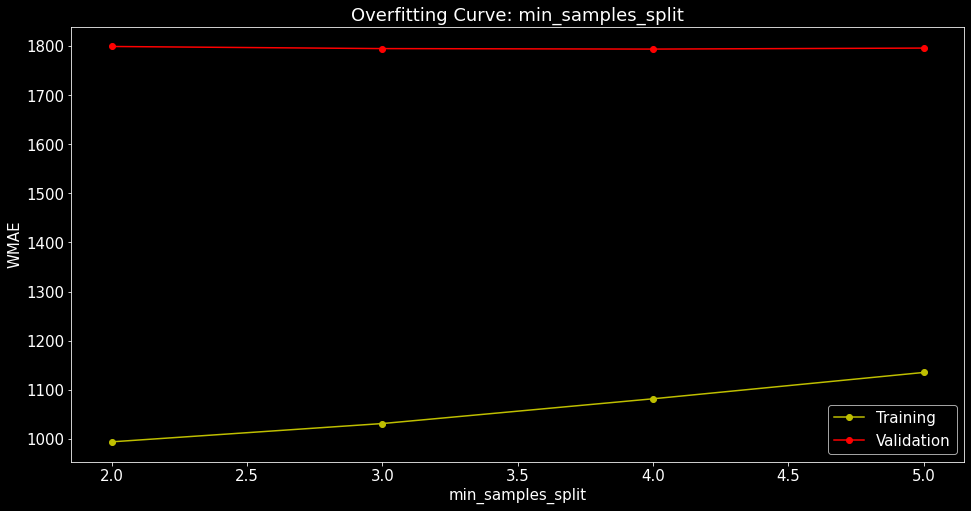

In [ ]:
fit_model_and_plot(RandomForestRegressor, 'min_samples_split', [2,3,4,5])

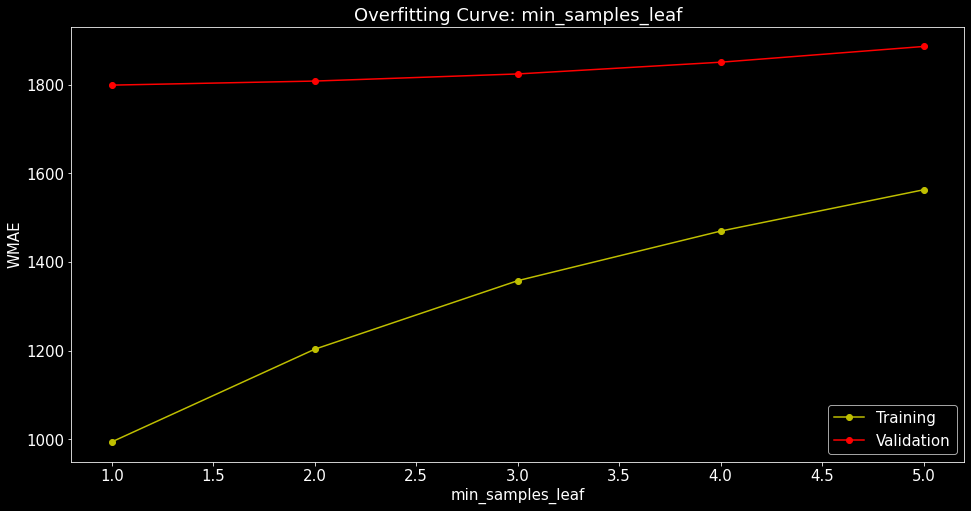

In [ ]:
fit_model_and_plot(RandomForestRegressor, 'min_samples_leaf', [1,2,3,4,5])

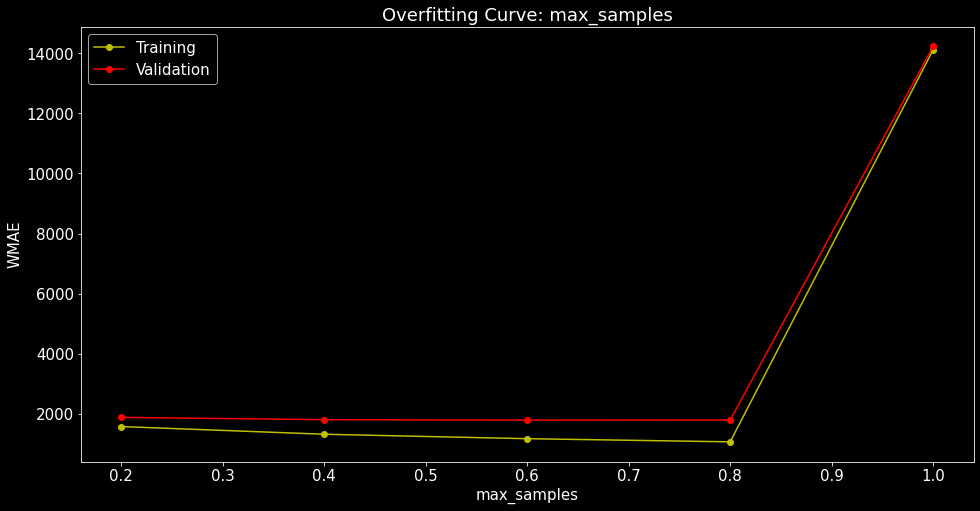

In [ ]:
fit_model_and_plot(RandomForestRegressor, 'max_samples', [0.2,0.4,0.6,0.8,1])

#### Random Forest Regressor with Tuned Hyper - Parameters

In [44]:
rf_reg_tuned = RandomForestRegressor(n_estimators=150, max_depth=30, max_features=15, min_samples_split=2, min_samples_leaf=1, max_samples=0.8, random_state=12345, n_jobs=-1)

In [45]:
rf_reg_tuned.fit(train_x_scaled, train_y)

RandomForestRegressor(max_depth=30, max_features=15, max_samples=0.8,
                      n_estimators=150, n_jobs=-1, random_state=12345)

In [46]:
print('WMAE for Training : {:.2f} | WMAE for Validation : {:.2f}'.format(WMAE(train_x, train_y, rf_reg_tuned.predict(train_x_scaled)),WMAE(val_x, val_y, rf_reg_tuned.predict(val_x_scaled)) ))

WMAE for Training : 1084.87 | WMAE for Validation : 1812.58


#### Feature Importance

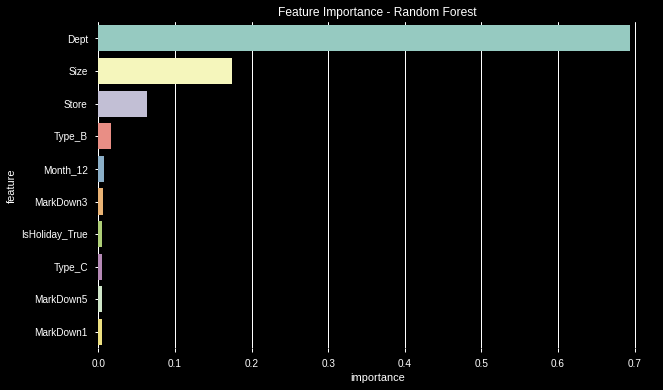

In [ ]:
importance_df_rf = pd.DataFrame({
    'feature': train_x_scaled.columns,
    'importance':rf_reg_tuned.feature_importances_
}).sort_values('importance', ascending=False)
with plt.style.context('dark_background'):
  plt.figure(figsize=(10,6))
  sns.barplot(data=importance_df_rf.head(10), x='importance', y='feature')
  plt.title('Feature Importance - Random Forest')

### Extreme Gradient Boosting Machine

In [ ]:
xgbm_reg = XGBRegressor(random_state=12345)

In [ ]:
xgbm_reg.fit(train_x_scaled, train_y)

[12:03:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=12345)

In [ ]:
print('WMAE for Training : {:.2f} | WMAE for Validation : {:.2f}'.format(WMAE(train_x, train_y, xgbm_reg.predict(train_x_scaled)),WMAE(val_x, val_y, xgbm_reg.predict(val_x_scaled)) ))

WMAE for Training : 6757.04 | WMAE for Validation : 6789.34


[22:29:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:29:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:29:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:30:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:31:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:32:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


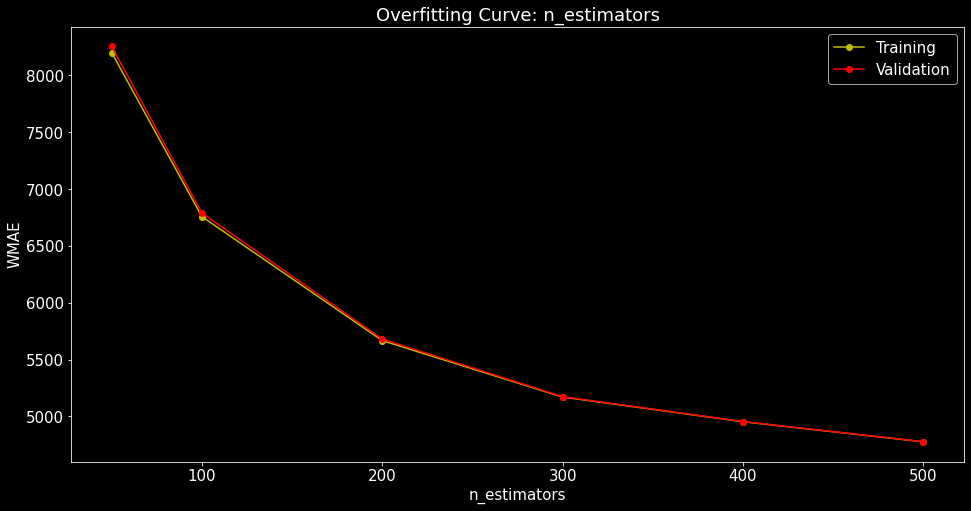

In [ ]:
fit_model_and_plot(XGBRegressor, 'n_estimators', [50,100,200,300,400,500])

[22:45:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:46:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:47:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:49:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


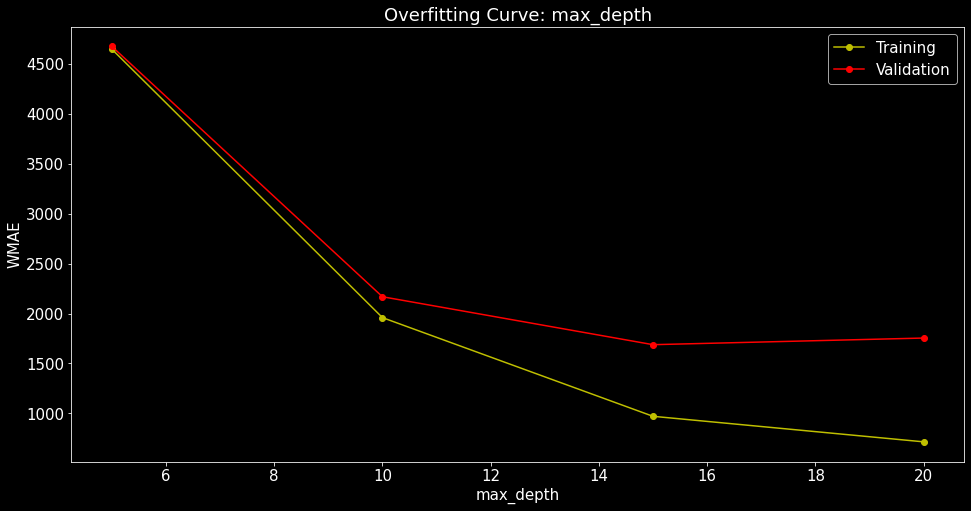

In [ ]:
fit_model_and_plot(XGBRegressor, 'max_depth', [5,10,15,20])

[22:55:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:56:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:56:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:56:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:57:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:57:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:57:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

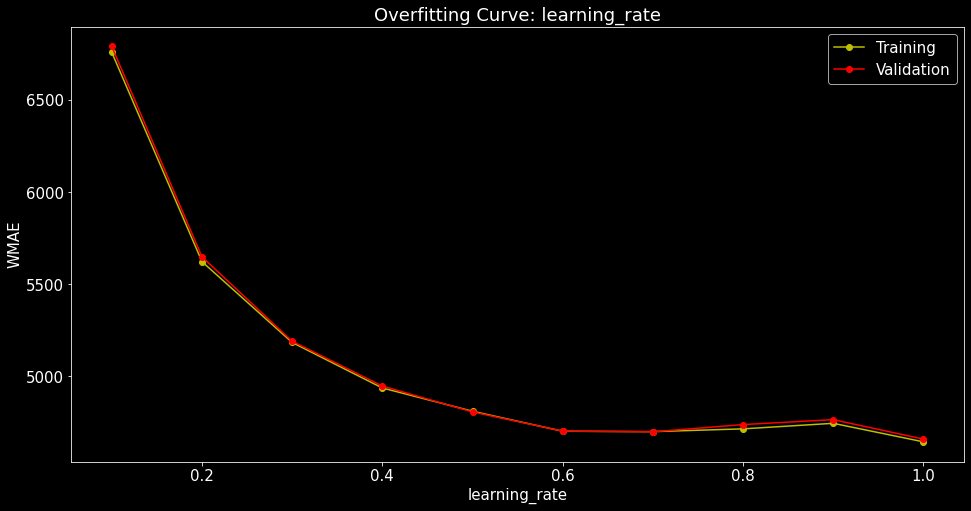

In [ ]:
fit_model_and_plot(XGBRegressor, 'learning_rate', [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

#### Extreme Gradient Boosting Machine Regressor with tuned Hyper-Parameters

In [ ]:
xgbm_reg_tuned = XGBRegressor(n_estimators=500, max_depth=15, learning_rate=0.6, random_state=12345, n_jobs=-1)

In [ ]:
xgbm_reg_tuned.fit(train_x_scaled, train_y)

[12:06:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.6, max_depth=15, n_estimators=500, n_jobs=-1,
             random_state=12345)

In [ ]:
print('WMAE for Training : {:.2f} | WMAE for Validation : {:.2f}'.format(WMAE(train_x, train_y, xgbm_reg_tuned.predict(train_x_scaled)),WMAE(val_x, val_y, xgbm_reg_tuned.predict(val_x_scaled))))

WMAE for Training : 659.65 | WMAE for Validation : 1864.47


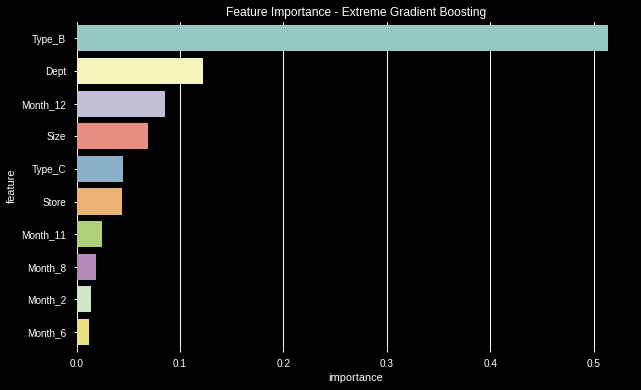

In [ ]:
importance_df_xgbm = pd.DataFrame({
    'feature': train_x_scaled.columns,
    'importance':xgbm_reg_tuned.feature_importances_
}).sort_values('importance', ascending=False)
with plt.style.context('dark_background'):
  plt.figure(figsize=(10,6))
  sns.barplot(data=importance_df_xgbm.head(10), x='importance', y='feature')
  plt.title('Feature Importance - Extreme Gradient Boosting')

### Best Model

In [ ]:
print('WMAE for Validation Data by Random Forest Regressor is {:.2f} and by Extreme Graident Boosting Machine is {:.2f}'.format(WMAE(val_x, val_y, rf_reg_tuned.predict(val_x_scaled)), WMAE(val_x, val_y, xgbm_reg_tuned.predict(val_x_scaled))))

WMAE for Validation Data by Random Forest Regressor is 1812.58 and by Extreme Graident Boosting Machine is 1864.47


So, Clearly Random Forest Model is giving better results than the Extreme Gradient Boosting Machine, even if it is by a small margin. So we wil use the Random Forest Regressor to predict the Weekly Sales for the Test Data.

## Making Predictions for the Test Data

In [47]:
test_output = pd.concat([test, pd.Series(rf_reg_tuned.predict(test_x_scaled), name='Weekly_Sales')], axis=1)
test_output.head()

,Store,Dept,Date,IsHoliday,Weekly_Sales
0,1,1,2012-11-02,False,11215.267536
1,1,1,2012-11-09,False,11203.112044
2,1,1,2012-11-16,False,11235.348403
3,1,1,2012-11-23,True,10941.182173
4,1,1,2012-11-30,False,10952.743529


In [48]:
Output = test_output[['Weekly_Sales']]

In [49]:
test_output.to_csv('test_output.csv', index=False)
Output.to_csv('Output.csv', index=False)